In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

customer = pd.read_csv("customers.csv")

In [4]:
#1
customer_nor = customer.copy()
customer_nor["Age"] = (customer_nor['Age'] - customer_nor['Age'].mean()) / customer_nor['Age'].std()
customer_nor["Income"] = (customer_nor['Income'] - customer_nor['Income'].mean()) / customer_nor['Income'].std()
customer_nor["Score"] = (customer_nor['Score'] - customer_nor['Score'].mean()) / customer_nor['Score'].std()

customer_nor = customer.drop(['ID', 'Gender'], axis = 1)

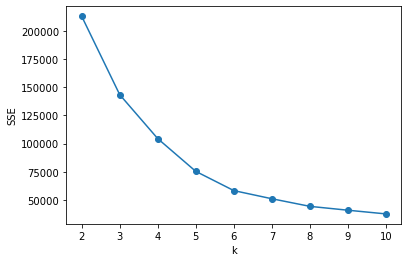

In [5]:
#2
SSE = []  
for k in range(2, 11):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(customer_nor)
    SSE.append(estimator.inertia_)

X = range(2, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

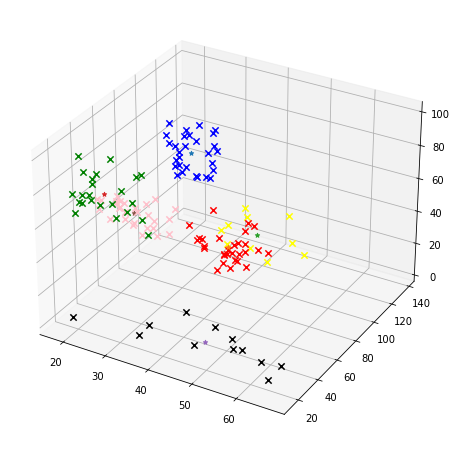

In [6]:
#3
best_k = 10

data = customer.copy()
data = data.drop(['ID', 'Gender'], axis = 1)

estimator = KMeans(n_clusters=best_k)  
estimator.fit(data)

centers = estimator.cluster_centers_ 
labels = estimator.labels_   

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(labels)):
    if labels[i] == 0 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='blue', s=40, label='class 0')
    elif labels[i] == 1 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='red', s=40, label='class 1')
    elif labels[i] == 2 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='yellow', s=40, label='class 2')
    elif labels[i] == 3 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='green', s=40, label='class 3')
    elif labels[i] == 4 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='black', s=40, label='class 4')
    elif labels[i] == 5 : 
        ax.scatter(data['Age'].iloc[i], data['Income'].iloc[i], data['Score'].iloc[i], marker='x', color='pink', s=40, label='class 5')
ax.scatter(centers[0,0], centers[0,1], centers[0,2], marker='*')
ax.scatter(centers[1,0], centers[1,1], centers[1,2], marker='*')
ax.scatter(centers[2,0], centers[2,1], centers[2,2], marker='*')
ax.scatter(centers[3,0], centers[3,1], centers[3,2], marker='*')
ax.scatter(centers[4,0], centers[4,1], centers[4,2], marker='*')
ax.scatter(centers[5,0], centers[5,1], centers[5,2], marker='*')
plt.show()

In [11]:
centers

array([[ 32.86206897,  78.55172414,  82.17241379],
       [ 46.55172414,  56.37931034,  47.48275862],
       [ 41.        , 109.7       ,  22.        ],
       [ 25.52173913,  26.30434783,  78.56521739],
       [ 48.75      ,  24.58333333,   9.58333333],
       [ 24.07142857,  58.07142857,  49.71428571],
       [ 41.91666667,  80.        ,  14.58333333],
       [ 32.2       , 109.7       ,  82.        ],
       [ 63.90909091,  53.04545455,  50.63636364],
       [ 36.69230769,  30.15384615,  35.53846154]])